# Problem set 2 Empirical Macro
## Due date 2nd of May 2019
### Nova SBE Francesco Franco
In this part of the problem set we will extract the factors from an artificial dataset to have a better comprehension of the principal component analysis used in BEE FAVAR.

# PART I

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
#from scipy.optimize import root
from numpy.polynomial import Polynomial as P
from sympy import Matrix
import math

#Changing the font of plots;
plt.rc('font', family='serif')

OUR data are denoted by $X$

In [2]:
# Create two time series of 15 obserbations by using a dictionary and then feed it in a dataframe
data = {'x1':[10,10.4,9.7,9.7,11.7,11,8.7,9.5,10.1,9.6,10.5,9.2,11.3,10.1,8.5],
        'x2':[10.7,9.8,10,10.1,11.5,10.8,8.8,9.3,9.4,9.6,10.4,9,11.6,9.8,9.2]}
X    = pd.DataFrame(data)

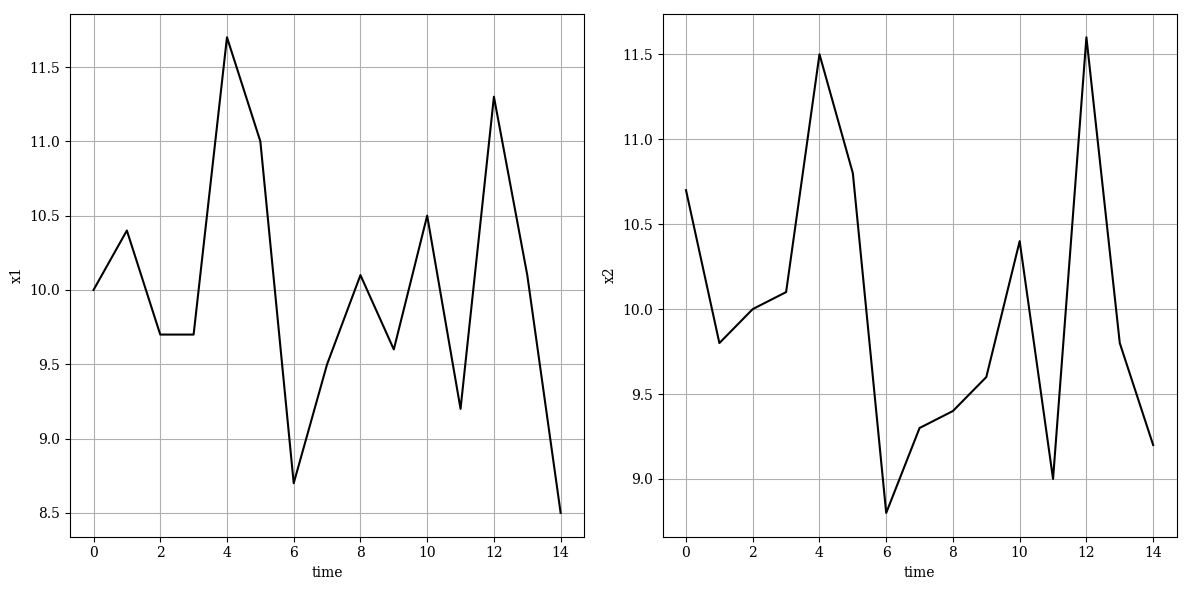

In [3]:
#Let us visualize the data, they are on purpose very related
f, axes = plt.subplots(ncols=2, figsize=(12,6), dpi=100); axes = axes.flatten()
for i in range(2): axes[i].set_xlabel('time'); axes[i].set_ylabel(f'x{i+1}')
for i in range(2): axes[i].plot(data[f'x{i+1}'], c='k'); axes[i].grid()
plt.tight_layout()

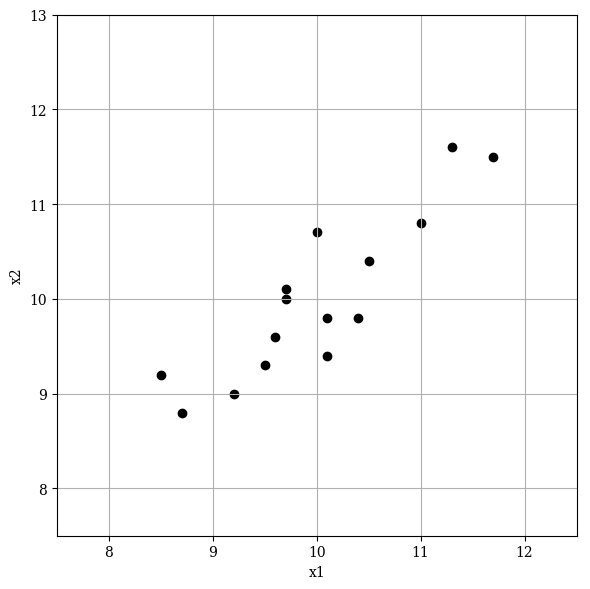

In [4]:
# Let us plot the scatter plot which gives us a different idea of the relationship between the two series
plt.figure(figsize=(6,6), dpi=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.ylim([7.5,13])
plt.xlim([7.5,12.5])

plt.scatter(data['x1'],data['x2'], c='k')
plt.tight_layout()

### Question 1
Compute the mean of the two time series and denote it by $\bar{X}$ (you can use the functions included in python or compute it $N^{-1}\sum_{i}^{N}x_{i}$ for each $i$.

*****

In [5]:
N = X.shape[0]
X̄ = (N**(-1)*X.sum()).values
X̄

array([10., 10.])

*****

### Question 2
Compute the variance covariance matrix of the two time series and denote it by $\Omega$ (again you can use the functions included in python or compute it $N^{-1}(X-\bar{X})'((X-\bar{X})$ directly.

*****

In [6]:
Ω = (N**(-1)*(X-X̄).T@(X-X̄)).values
Ω

array([[0.74533333, 0.634     ],
       [0.634     , 0.68533333]])

*****

## Eigenvalues
A $p\times p$ symemtric, nonsingular matrix, such as the covariance matrix $\Omega$ may be reduced to a diagonal matrix $S$ by premultiplying and postmultiplying it by a particular orthonormal matrix $\Lambda$ such that $$\Lambda'\Omega\Lambda=S$$
The diagonal elements of $S$ are called the eigenvalues and the columns of $\Lambda$ are called the eigenvectors (notice that usually $\Lambda$ is used to denote de eigenvalues matrix but here I switched notation to be consistent with the class notes) .

The eigenvalues may be obtained from the solution of the equation (the characteristic equation, where $|A|$ denotes the determinant of $A$): $$|\Omega-sI|=0$$

### Question 3
Find the eigenvalues $s_1$ and $s_2$ by solving the characteristic equation $$|\Omega-sI|=\begin{vmatrix}\omega_{11}-s & \omega_{12}\\
\omega_{21} & \omega_{22}-s
\end{vmatrix}=\left(\omega_{11}-s\right)\left(\omega_{22}-s\right)-\omega_{21}\omega_{12}=0$$

*****

$$\left(\omega_{11}-s\right)\left(\omega_{22}-s\right)-\omega_{21}\omega_{12}=(\omega_{11}\omega_{22}-\omega_{21}\omega_{12})-(\omega_{11}+\omega_{22})s+s^2=0$$

In [7]:
s = P([-Ω[1,0]*Ω[0,1]+Ω[0,0]*Ω[1,1], -(Ω[0,0]+Ω[1,1]), 1]).roots()
s

array([0.08062395, 1.35004272])

*****

## Eigenvectors
Now you can find the eigenvectors as follows: find (unnormalized eigenvector)  $t_1$ associated to $s_1$ solves the following equation $$[\omega -s_1I]t_1=0$$ 
Which using our matrices is $$\left[\Omega-s_{1}I\right]t_{1}=\begin{bmatrix}\omega_{11}-s_{1} & \omega_{12}\\
\omega_{21} & \omega_{22}-s_{1}
\end{bmatrix}\begin{bmatrix}t_{11}\\
t_{21}
\end{bmatrix}=0$$ which gives two equations  $$t_{11}\left(\omega_{11}-s_{1}\right)+\omega_{12}t_{21}=0$$$$t_{11}\omega_{21}+t_{21}\left(\omega_{22}-s_{1}\right)=0$$
 

To solve normalize $t_{11}=1$ and solve using the first equation $t_{21}$. Finally plug the vector $t_1$ into the normalizing equation to obtain the eigenvector $\lambda_1$: $$\lambda_{1}=\frac{t_{1}}{\sqrt{t_{1}'t_{1}}}$$

### Question 4
Find the two eigenvectors and obtain $$\Lambda = [\lambda_1 | \lambda_2]$$

*****

By having $t_{11}=1$:
$$t_{21} = -\frac{1\cdot(\omega_{11}-s_1)}{\omega_{12}}$$

In [8]:
t_11, t_12 = 1, 1
t_21       = -(t_11*(Ω[0,0]-s[0]))/Ω[0,1]
t_22       = -(t_12*(Ω[0,0]-s[1]))/Ω[0,1]
λ_1, λ_2   = [t/np.sqrt(np.dot(t,t)) for t in [np.array([t_11, t_21]), 
                                               np.array([t_12, t_22])]]

In [9]:
Λ = np.column_stack((λ_1, λ_2))
Λ

array([[ 0.69019355,  0.72362481],
       [-0.72362481,  0.69019355]])

*****

### Question 5
Check that the eigenvectors are orthonormals, that is $\lambda_1'\lambda_1=1$, $\lambda_2'\lambda_2=1$ and $\lambda_1'\lambda_2=0$

*****

In [10]:
math.isclose(λ_1.T@λ_1, 1, abs_tol=1e-15), \
math.isclose(λ_2.T@λ_2, 1, abs_tol=1e-15), \
math.isclose(λ_1.T@λ_2, 0, abs_tol=1e-15)

(True, True, True)

*****

### Question 6
Verify that $\Lambda'\Omega\Lambda=S$

*****

In [11]:
S                          = np.zeros((2,2))
S[np.diag_indices_from(S)] = s

In [12]:
np.isclose(Λ.T@Ω@Λ, S)

array([[ True,  True],
       [ True,  True]])

*****

# Interpretation
you are changing the axis coordinates of the point from the blue axis to the red axis. Notice that the first eigenvector (the red axis with the thicker arrow, the thickness is here the value of the eigenvalue) corresonpds to the axis that explain the most the data 

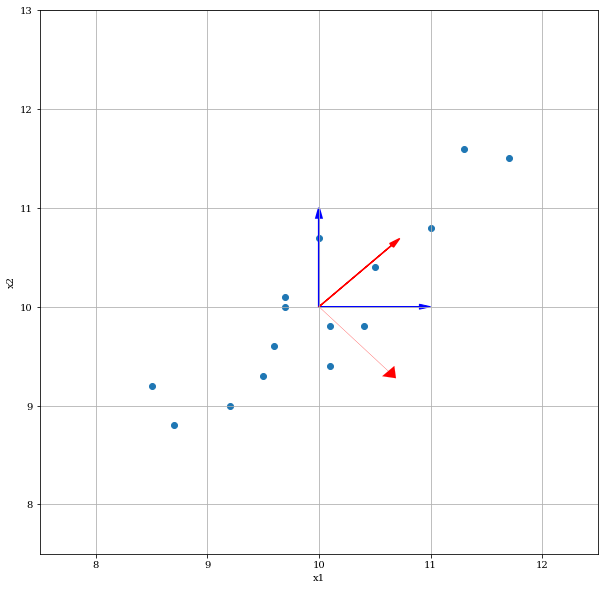

In [13]:
# Notice that in this graph in the new axis coordinates
# you need to feed the values of the eigenvalues s and the eigenvectors V
plt.figure(figsize=(10,10))
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.ylim([7.5,13])
plt.xlim([7.5,12.5])

#old axis coordinates
plt.arrow(10, 10, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1,linewidth=2,color='b')
plt.arrow(10, 10, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, color='b',linewidth=1)

#new axis coordinates
plt.arrow(10, 10, Λ[0,0], Λ[1,0], head_width=0.15, length_includes_head=True, head_length=0.1, color='r',linewidth=s[0])
plt.arrow(10, 10, Λ[0,1], Λ[1,1], head_width=0.05, length_includes_head=True, head_length=0.1, color='r',linewidth=s[1])


plt.scatter(data['x1'],data['x2'])
plt.show()

### Question 7
Compute the factors $F_t = \Lambda X_t$ and plot them

****

In [14]:
F = X.values@Λ
F

array([[-0.84084995, 14.62131907],
       [ 0.0864898 , 14.2895948 ],
       [-0.54137065, 13.92109614],
       [-0.61373313, 13.9901155 ],
       [-0.24642076, 16.40363609],
       [-0.22301888, 15.41396323],
       [-0.36321443, 12.36923907],
       [-0.17287199, 13.2932357 ],
       [ 0.16888166, 13.79642994],
       [-0.32094008, 13.57265624],
       [-0.27866573, 14.77607341],
       [-0.16284261, 12.86909019],
       [-0.59486066, 16.18320552],
       [-0.12056826, 14.07250736],
       [-0.79070306, 12.50059153]])

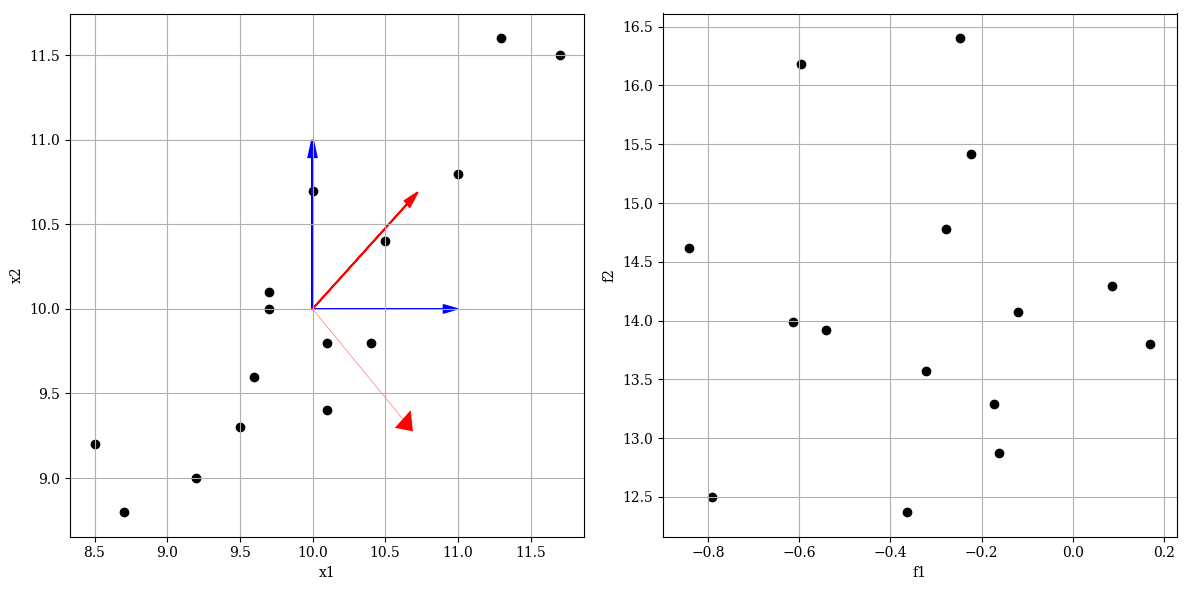

In [15]:
f, axes = plt.subplots(ncols=2, figsize=(12,6), dpi=100); axes = axes.flatten()
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c='k')
axes[0].set_xlabel('x1'); axes[0].set_ylabel('x2')
axes[0].arrow(10, 10, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1,linewidth=2,color='b')
axes[0].arrow(10, 10, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, color='b',linewidth=1)
axes[0].arrow(10, 10, Λ[0,0], Λ[1,0], head_width=0.15, length_includes_head=True, head_length=0.1, color='r',linewidth=s[0])
axes[0].arrow(10, 10, Λ[0,1], Λ[1,1], head_width=0.05, length_includes_head=True, head_length=0.1, color='r',linewidth=s[1])
axes[1].scatter(F[:,0], F[:,1], c='k')
axes[1].set_xlabel('f1'); axes[1].set_ylabel('f2')
for i in range(2): axes[i].grid()
plt.tight_layout()

****

# PART II

In our code to reproduce BEE, we of course obtain the principal components more rapidly by using linear algebra routines that compute the eigenvectors efficiently.

In [16]:
'''
   Data Description in Appendix1 page 416-420
   The transformation codes are:
   1:no transformation
   2:first difference
   4:logarithm
   5:first difference of logarithm.
   An asterisk *, next to the mnemonic, denotes a variable assumed 
   to be slow-moving in the estimation
'''

# Let us keep the indexes of the slow-moving variables
list_slowindex = list(range(0,53))+list(range(102,119))         
list_xindex    = [15,107,77,80,95,92,73,101,16,48,50,25,47,117,53,61,70,119] 
dict_data      = {0:'IPP',
                  1:'IPF',
                  2:'IPC',
                  3:'IPCD',
                  4:'IPCN'}

In [17]:
def extract_svd(x,nf):
    '''
    Compute the factors with the SVD
    
    Inputs
        x : the data
        nf: number of factors
             
     Outputs
         lam: the factor loadings
         fac: the factors    
    '''
    
    U, s, V = LA.svd(x.values)
    W       = V.T[:,:nf]
    lam     = W*np.sqrt(x.shape[1])
    fac     = x.values@lam/x.shape[1]
    
    return fac, lam 

In [18]:
def facrot(F,Ffast,Fslow, n_factors):
    '''
    Computes the rotation of the factors as described in p.405 of the paper
    
    Inputs
        F    : unrestricted PC estimates (from all the dataset)
        Ffast: factors assumed to be fast moving (e.g. policy instrument)
        Fslow: proxy of the slow moving factors
    
    Outputs
        Fr: rotation of factors
    '''

    F, Fslow, Ffast = [np.array(i) for i in [F, Fslow, Ffast]]
    Fslow           = np.hstack([Fslow, Ffast])
    betas           = LA.inv(Fslow.T@Fslow)@Fslow.T@F
    Fr              = F - np.dot(Ffast,betas[n_factors:,:])
    
    return pd.DataFrame(Fr)

In [19]:
def extract_fac(x,Y,K,slowindex, n_factors):
    # Routine to extract the factors
    # 1. Extract factors from whole dataset F
    # 2. Extract factors from slow moving dataset Fslow
    # 3. Regress factors F on Flsow and Y and subtract effect of Y from F to obtain Fr
    
    x              =  pd.DataFrame(x)
    xslow          = x.loc[:,x.columns[slowindex]]
    F,Lf           = extract_svd(x,K)
    Fslow , Lfslow = extract_svd(xslow,K)
    Fr             = facrot(F,Y,Fslow, n_factors)
    
    return Fr

In [20]:
def shuffle(x,new_index):
    # Reshufle index of a variable (here a DataFrame)
    
    T         = x.shape[0]
    x_s       = np.zeros(x.shape)
    for ii in range(0,T):
        x_s[ii,:] = x.iloc[new_index[ii],:]
    return x_s    

In [21]:
def simulate(X,e,num_vars,num_lags,num_obs,A0,bhat,i2):
    
    T_var = num_obs - num_lags
    X_sim = np.zeros([num_vars,num_lags])
    
    for lag in range(num_lags):
        X_sim[:,num_lags-lag-1] = X.iloc[lag,:]
    X_sim   = np.reshape(X_sim,(num_lags*num_vars,1),order='F')
    X_sim   = np.hstack((X_sim,np.zeros([num_lags*num_vars,num_obs-1])))        
    D       = np.vstack((A0,np.zeros([(num_lags-1)*num_vars,num_vars])))
    c_b = np.vstack((bhat.T,np.hstack((np.identity((num_lags-1)*num_vars),np.zeros([(num_lags-1)*num_vars,num_vars]))))) 
    
    for t in range(T_var-1):
        X_sim[:,t+num_lags+1]   = c_b@X_sim[:,t+num_lags] + D@e.T[:,np.int(i2[t])]
            
    X_sim      = X_sim[:num_vars,:].T
    return X_sim

In [22]:
def lags(X,num_lags):
    # routine to lag a series or a dataset
    lfy = pd.DataFrame()
    fy  = pd.DataFrame(X)
    for i in range(1,num_lags+1):
        lfy = pd.concat([lfy,fy.shift(i).add_suffix("-"+str(i))],axis=1)
    fyr  = np.array(fy.iloc[num_lags:,:])
    lfyr = np.array(lfy.iloc[num_lags:,:])
    return fyr,lfyr

In [23]:
def identific(Omegahat):
    #routine to perform the cholesky identification
    smatr = LA.cholesky(Omegahat)
    d = np.zeros(smatr.shape)
    np.fill_diagonal(d,np.diag(smatr))
    smatr = LA.inv(d)@smatr
    return smatr


In [24]:
def impulses(num_impulses,num_vars,shock,bhat,A0, num_lags):
    IRF  = np.zeros([num_impulses,num_vars,num_vars])
    c_br = np.vstack((bhat.T,np.hstack((np.identity((num_lags-1)*num_vars),np.zeros([(num_lags-1)*num_vars,num_vars]))))) 
    Temp = np.identity(c_br.shape[0])
    psi  = []
    for t in range(num_impulses):
        psi_t = Temp[:num_vars,:num_vars] 
        IRF[t,:,:] = psi_t@A0  # store the IRF
        Temp = c_br@Temp            # computes the exponent of the matrix
    IRFr   = IRF@shock    
    irfr   = pd.DataFrame({i:IRFr[i].flatten() for i in range(num_impulses)}).T #save IRFs into dataframe
    return irfr

In [25]:
def Bands(num_impulses, M, K, nrep1, nrep2, xir, Y, u0, F0, Lf0, slowindex, 
          num_factors, num_lags, num_vars, num_obs, shock, xindex):
    '''
    LOOP to COMPUTE the Confidence Intervals using bootsrapping
    '''
    
    # Containers of the IRF
    imp  = np.zeros([num_impulses*(M+K),nrep1*nrep2])
    impx = np.zeros([num_impulses*xir.shape[1],nrep1*nrep2])
    
    #main loop
    repetition=0
    for frep in range(0,nrep1):
        # this loop appears to be less important it was designed to bootstrap the estimates coming from the factors extraction
        T_data = Y.shape[0]
        
        # create the new index to reorder the osbervations randomly
        i      = (T_data-1)*np.random.rand(T_data,1)
        i      = np.round(i)
        
        # reorder the residuals of the X_t = LAMBDA*F_t + u_t
        u_star    = shuffle(u0,i) # u_star_t is reordererd u_t
        
        # build a new dataset X_star_t = LAMBDA*F_t + u_star_t
        x_star    = F0@Lf0.T+ u_star
        
        # get the factors from the new dataset
        Fr_star   = extract_fac(x_star,Y,K,slowindex, num_factors)
        
        # build the VAR data
        fy        = np.hstack([Fr_star, Y])
        
        # keep the OLS coef of the (original) variables to the VAR variables(xir is a subsample we are interestd in)
        # X_t = beta*Y_t + e_t 
        
        bx        = LA.inv(fy.T@fy)@fy.T@xir
        ex        = xir - fy@bx
        
        # Estimate the VAR with the new VAR data 
        fy2,lfy2  = lags(fy,num_lags)
        bhat      = LA.inv(lfy2.T@lfy2)@lfy2.T@fy2
        eps       = fy2-lfy2@bhat
        
        # keep the number of observations in the VAR
        T_var     = fy2.shape[0]
        k_var     = fy2.shape[1]
        p         = np.int((lfy2.shape[1]-1)/k_var)
        
        btilda    = bhat
        bxtilda   = bx
        
        for rep in range(1,nrep2):
            # this loop computes the IRF
            
            repetition = repetition+1
            # new index for the bootsrap
            i2         = (T_var-1)*np.random.rand(T_var,1)
            i2         = np.round(i2)
           
            Xr         = pd.DataFrame(fy)
            # randomly select intial values for the lags
            i3         = (T_data-1)*np.random.rand(T_data,1)
            i3         = np.round(i3)
            Xr         = shuffle(Xr,i3)
            Xr         = pd.DataFrame(Xr)
            
            # SIMULATE THE NEW TIME SERIES Y = B*Y(-1) + u(reshufled)
            X_sim      = simulate(Xr,eps,num_vars,num_lags,num_obs,np.eye(num_vars),btilda,i2)
            
            # Compute the Xir_star_t = beta*Y_star_t + e_t         
            ex2        = shuffle(ex,i3)    
            xr2        = X_sim@bxtilda + ex2
            bxr        = LA.inv(X_sim.T@X_sim)@X_sim.T@xr2
            
            # Estimate the VAR
            fyr,lfyr   = lags(X_sim,num_lags)
            br         = LA.inv(lfyr.T@lfyr)@lfyr.T@fyr
            er         = fyr - lfyr@br
            Omegahatr  = er.T@er/(er.shape[0]-p*k_var-1)
            
            # indentify the SVAR
            A0r      = identific(Omegahatr)
            # compute the IRF
            irfr       = impulses(num_impulses,num_vars,shock,br,A0r, num_lags)
            impr       = np.array(irfr)
            impxr      = np.array(impr@bxr)
            
            # STORE THE IRFS 
            imp[:,repetition-1]  = np.reshape(impr,(num_impulses*(1+num_factors),1)).flatten()
            impx[:,repetition-1] = np.reshape(impxr,((num_impulses*len(xindex)),1)).flatten()
    
    # KEEP THE 5% - 95% IRF sorted 
    imp    = imp.reshape(num_impulses,M+K,nrep1*nrep2)
    impx   = impx.reshape(num_impulses,len(xindex),nrep1*nrep2)
    imp    = np.sort(imp,axis=2)
    impx   = np.sort(impx,axis=2)
    nrep   = nrep1*nrep2
    impci  = imp[:,:,[np.int(0.05*nrep),np.int(0.95*nrep)]]
    impxci = impx[:,:,[np.int(0.05*nrep),np.int(0.95*nrep)]]
    
    return impxci

In [26]:
def BBE(source, σ_multiplier, n_factors):
    '''
    Simulate BBE with two input paramaters.
    
    Input
        source      : str data
        σ_multiplier: int/float
        n_factors   : int
    
    Output 
        irf  : impulse 
        irf_x: impulse in x
    
    '''
    
    ''' Transforming the data '''
    df_data = pd.read_csv(source, header=None)
    σ_ffr   = df_data.loc[:,76].std()*σ_multiplier
    df_tran = df_data.apply(lambda x: (x-x.mean())/x.std())
    
    ''' Specification: what is observable '''
    observables = [76]        #["ffr"]
    Y = df_tran.loc[:,observables]
    X = df_tran.loc[:,df_tran.columns.difference(observables)]
    
    ''' Parameters '''
    T, N               = X.shape     # n of observations and series
    M                  = Y.shape[1]  # n of series considered observables factors
    K                  = n_factors
    n_impulses, n_lags = 40, 13
    n_rep1, n_rep2     = 1, 100
    nsteps             = 48
    
    ''' Setup '''
    F0, Lf0         = extract_svd(X,K)
    xslow           = df_tran.loc[:,df_tran.columns[list_slowindex]]
    Fslow0, Lfslow0 = extract_svd(xslow,K)
    Fr0             = facrot(F0,Y,Fslow0, n_factors)
    u0              = X -F0@Lf0.T
    X               = pd.concat([Fr0, Y],axis=1)
    XLAG            = pd.DataFrame()
    for i in range(1,n_lags+1):
        XLAG        = pd.concat([XLAG,X.shift(i).add_suffix(f"-{i}")],axis=1)
        
    ''' Renaming '''
    X2     = X.iloc[n_lags:,:]
    XLAG2  = XLAG.iloc[n_lags:,:]
    n_vars = X2.shape[1]
    n_obs  = XLAG2.shape[0]
    X3     = np.array(X2)
    XLAG3  = np.array(XLAG2)
    
    ''' Estimation '''
    #VAR - standard OLS
    β̂     = LA.inv(XLAG3.T@XLAG3)@XLAG3.T@X3
    #Estimated errors
    ε     = (X3 - XLAG3@β̂ )
    n_obs = T
    # Estimated covariance matrix
    Ω̂     = ε.T@ε/(T-n_lags*n_vars-1)
    # Cannonical Form
    c_β̂   = np.vstack((β̂ .T,np.hstack((np.identity((n_lags-1)*n_vars),
                                        np.zeros([(n_lags-1)*n_vars,n_vars])))))
    
    ''' Identification '''
    A0                         = LA.cholesky(Ω̂ )
    d                          = np.zeros(A0.shape)
    d[np.diag_indices_from(d)] = np.diag(A0)
    A0                         = np.dot(np.linalg.inv(d),A0)
    
    ''' IRFs '''
    # IRFs are stored in a 3-dimensional array. 
    # Dimension 1 is time, 2 is variable, and 3 is shock. 
    IRF            = np.zeros([n_impulses,n_vars,n_vars])
    temp           = np.identity(c_β̂ .shape[0])
    ψ              = []
    for t in range(n_impulses):
        ψ_t        = temp[:n_vars,:n_vars]
        # store the IRF
        IRF[t,:,:] = ψ_t@A0     
        # computes the exponent of the matrix
        temp       = c_β̂ @temp 
    
    ''' Shocks '''
    shock = np.hstack([np.zeros([1,K+M-1]), np.ones([1,1])*0.25/σ_ffr]).T
    IRF   = IRF@shock    
    irf   = pd.DataFrame({i:IRF[i].flatten() for i in range(n_impulses)}).T
    
    ''' Recovering the shocks '''
    xir   = df_tran.loc[:,df_tran.columns[list_xindex]]
    bx0   = LA.inv(X.T@X)@X.T@xir
    irf_x = irf@bx0
    
    ''' Confidence Intervals using bootsrapping '''
    impxci = Bands(n_impulses, M, K, n_rep1, n_rep2, xir, Y, u0, F0, Lf0, 
                   list_slowindex,n_factors, n_lags, n_vars, n_obs, 
                   shock, list_xindex)
    
    return irf, irf_x, impxci

In [27]:
def graphs(irfs, irfs_new, legend_new):
    '''
    Plot the IRFs
    '''
    
    f, axes = plt.subplots(ncols=1, nrows=3, figsize=(6,9), dpi=100); axes = axes.flatten()
    
    for j, array in enumerate([irfs, irfs_new]):
        axes[0].plot(np.exp(np.cumsum(array[1][15]))-1, c=['k','grey'][j], linestyle="-")
        axes[1].plot(np.exp(np.cumsum(array[1][107]))-1, c=['k','grey'][j], linestyle="-")
        axes[2].plot(array[0][array[0].shape[1]-1],c=['k','grey'][j], linestyle="-")
        #axes[2].plot(array[1][0],c=['k','grey'][j], linestyle="-")
        
    for i in range(3): 
        axes[i].set_title(['IP', 'CPI', 'MP shock'][i])
        axes[i].grid(); axes[i].set_xlabel('Period'); axes[i].legend(['Original', legend_new])
        axes[i].axhline(y=0, color="k", linewidth=0.5)
    
    for j, array in enumerate([irfs, irfs_new]):
        for band in range(2):
            axes[0].plot(np.exp(np.cumsum(array[2][:,0,band]))-1, c=['k','grey'][j],linestyle=':')
            axes[1].plot(np.exp(np.cumsum(array[2][:,1,band]))-1, c=['k','grey'][j],linestyle=':')
            #axes[2].plot(array[2][:,16,band], c=['k','grey'][j],linestyle=':')
    
    
    plt.tight_layout()

### Question 1
Notice that in the identification of the monetary policy shock we use a cholesky decomposition. What is that? Remember that the SVAR identification occurs by finding a $A(0)$ that relates the innovations of the VAR with the structural shocks of the SVAR $$\eta_t = A(0)\epsilon_t$$
now as usual we have the variance from the innovations $\hat{\Omega_t}$. Then $$\hat{\Omega_t}= A(0)'\epsilon_t'\epsilon_t A(0).$$ In the Blanchard and Quah identification we had assumed that that the structural shock had unit variance, here we assume that the diagonal of $A(0)$ is composed by 1. We can do that because we assume that the standard deviation of the monetary policy shock is the standard deviation of the federal fund rate.
Change in the code the standard deviation of the monetary policy shock (double it). how do the impulse response change?

***

In [28]:
irf, irf_x, impxci          = BBE(source='nsbalpanel.csv', σ_multiplier=1, n_factors=3)
irf_23, irf_x_23, impxci_23 = BBE(source='nsbalpanel.csv', σ_multiplier=2, n_factors=3)

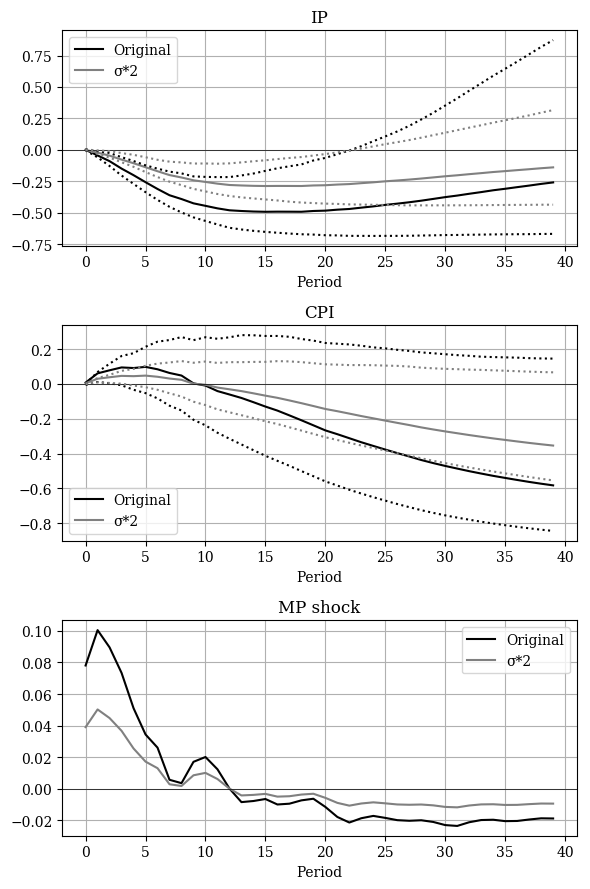

In [29]:
graphs([irf, irf_x, impxci], [irf_23, irf_x_23, impxci_23], 'σ*2')

****

### Question 2*
Obtain the IRF to a monetary policy shock estimating the FAVAR with 4 and 5 factors.

****

In [30]:
irf_14, irf_x_14, impxci_14 = BBE(source='nsbalpanel.csv', σ_multiplier=1, n_factors=4)

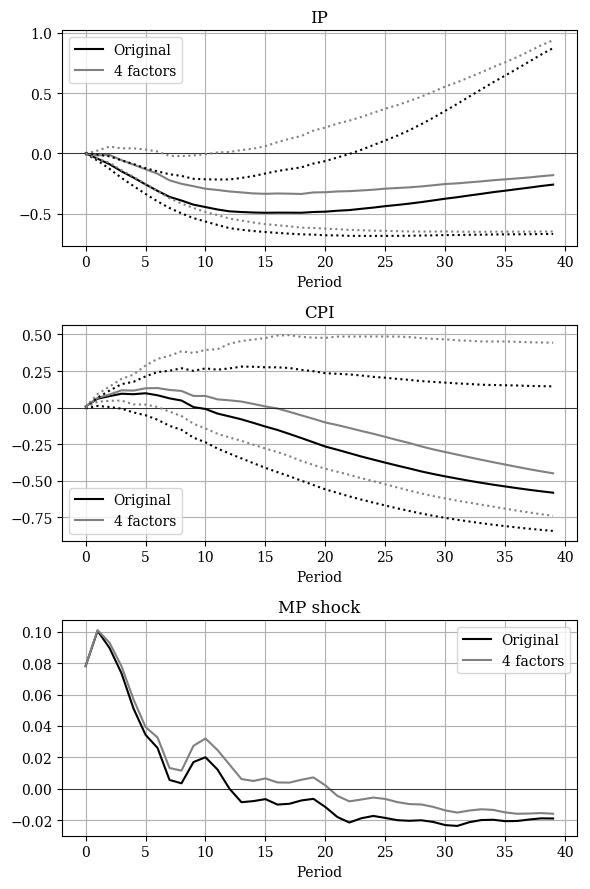

In [31]:
graphs([irf, irf_x, impxci], [irf_14, irf_x_14, impxci_14], '4 factors')

In [32]:
irf_15, irf_x_15, impxci_15 = BBE(source='nsbalpanel.csv', σ_multiplier=1, n_factors=5)

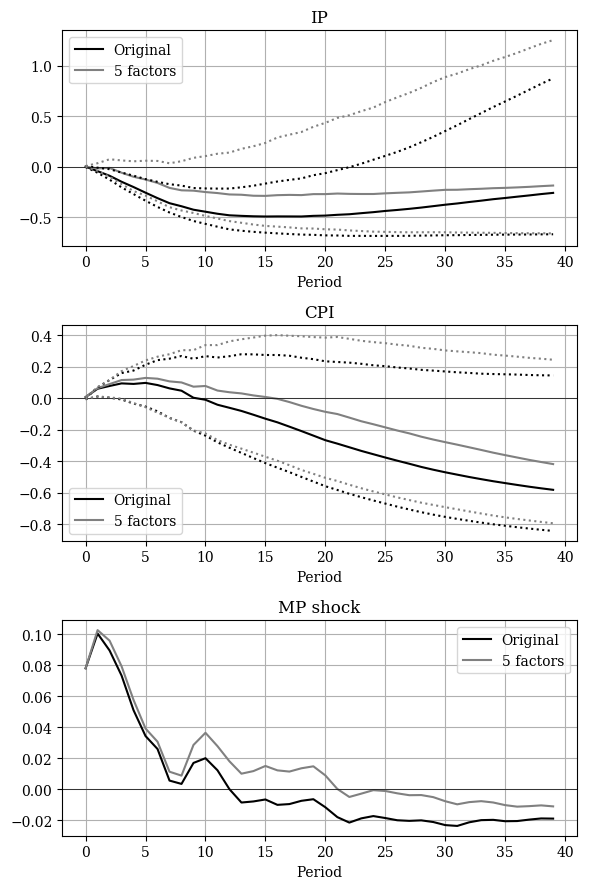

In [33]:
graphs([irf, irf_x, impxci], [irf_15, irf_x_15, impxci_15], '5 factors')

****

****

# Extra plots

In [34]:
extra_vars = {15:['IP', 2], 107:['CPI', 2], 
              77:["3m_TBills",0],80:["5y_TBills",0],95:["Monetary_Base",1],
              92:["M2",1],73:["ER_Yen",1],101:["Commodity_Price",0],
              16:["Capacity_Utilization",0],48:["Personal_Consumption",2],
              50:["Cons_Non-durables",2],
              25:["Unemp_Rate",0],47:["Employment",0],117:["Avg_H_Earnings",2],
              53:["Housing_Starts",0],61:["New_Orders",0],70:["Dividends",0],
              119:["Cons_Expectations",0]}

In [35]:
def allplots(ir, im):
    f, axes = plt.subplots(ncols=4,nrows=5, figsize=(12,15), dpi=100); axes=axes.flatten(); 
    for ax in axes[-2:]: ax.set_axis_off()
    for i, var in enumerate(extra_vars):
        array_temp = [] 
        if extra_vars[var][1] ==0:
            array_temp = ir[var]
            bands_temp = [im[:,i,band] for band in range(2)]
        if extra_vars[var][1] ==1:
            array_temp = np.cumsum(ir[var])
            bands_temp = [np.cumsum(im[:,i,band]) for band in range(2)]
        if extra_vars[var][1] ==2:
            array_temp = np.exp(np.cumsum(ir[var]))-1
            bands_temp = [np.exp(np.cumsum(im[:,i,band]))-1 for band in range(2)]
        axes[i].plot(array_temp, c='k')
        for band in range(2): axes[i].plot(bands_temp[band], c='k', linestyle=':')
        axes[i].axhline(y=0, color="k", linewidth=0.5); axes[i].grid()
        axes[i].set_title(extra_vars[var][0])
        #print(var, extra_vars[var][0], extra_vars[var][1])    
    plt.tight_layout()

## σ multiplier = 1, number of factors = 3

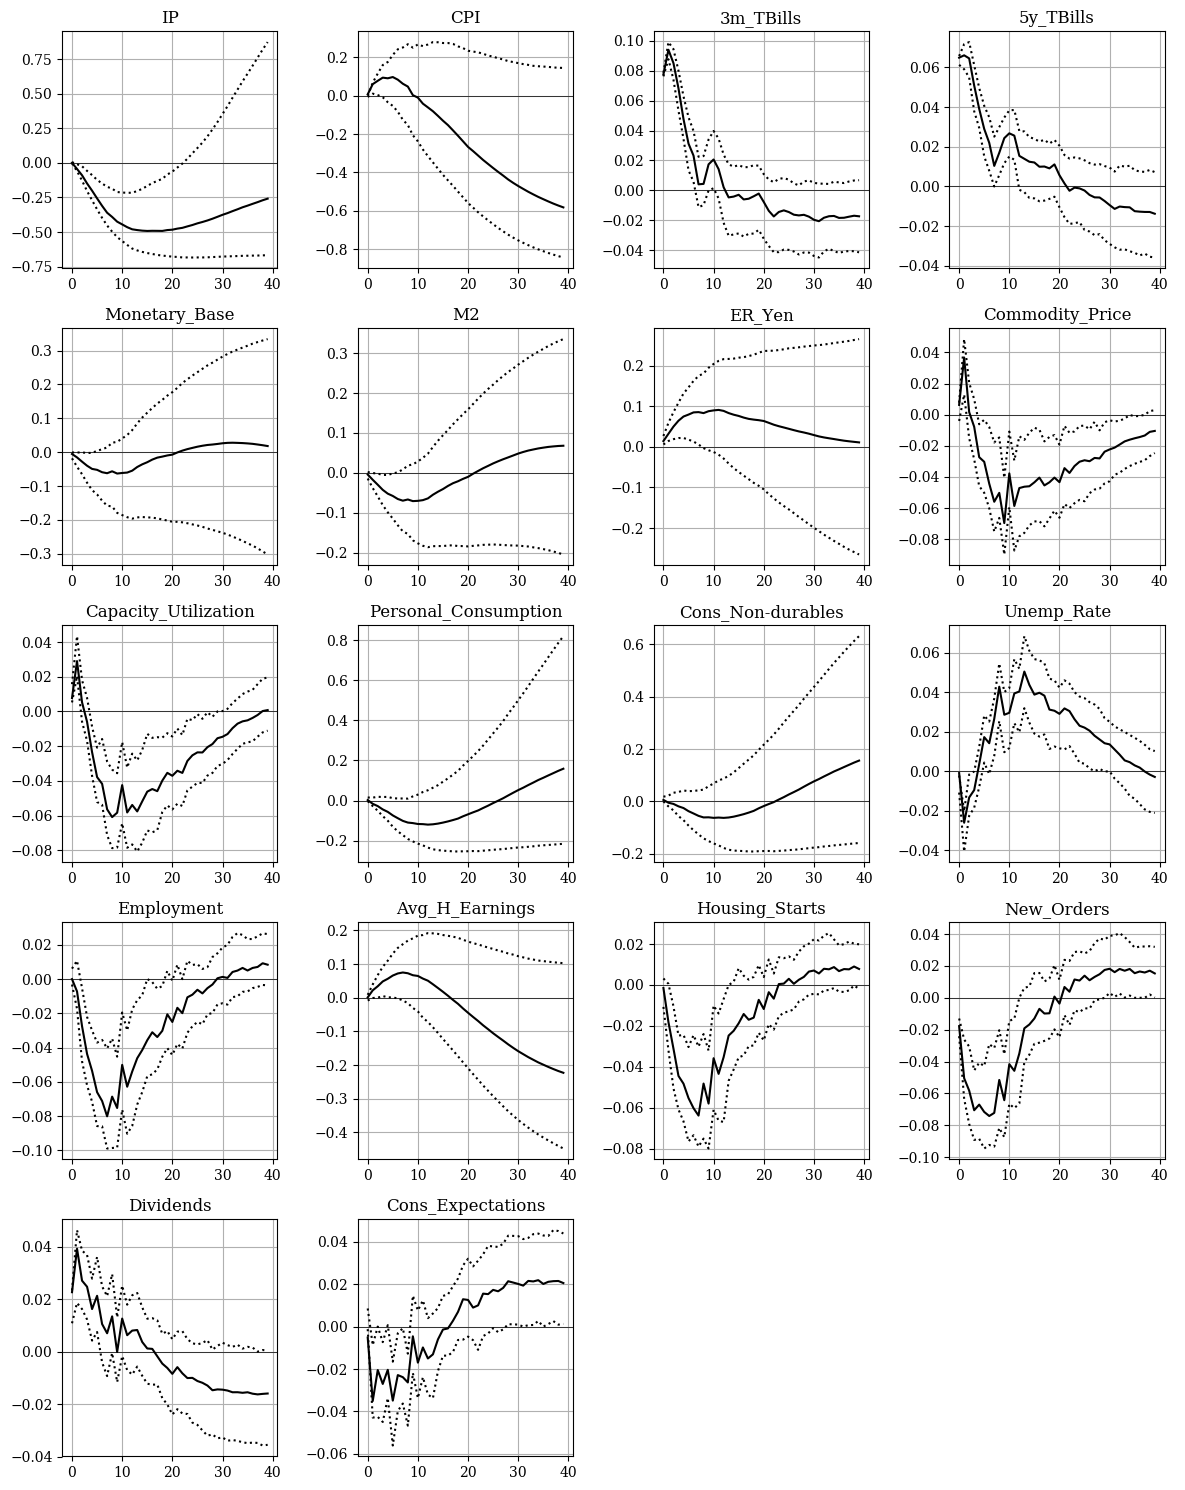

In [36]:
allplots(irf_x, impxci)

## σ multiplier = 2, number of factors = 3

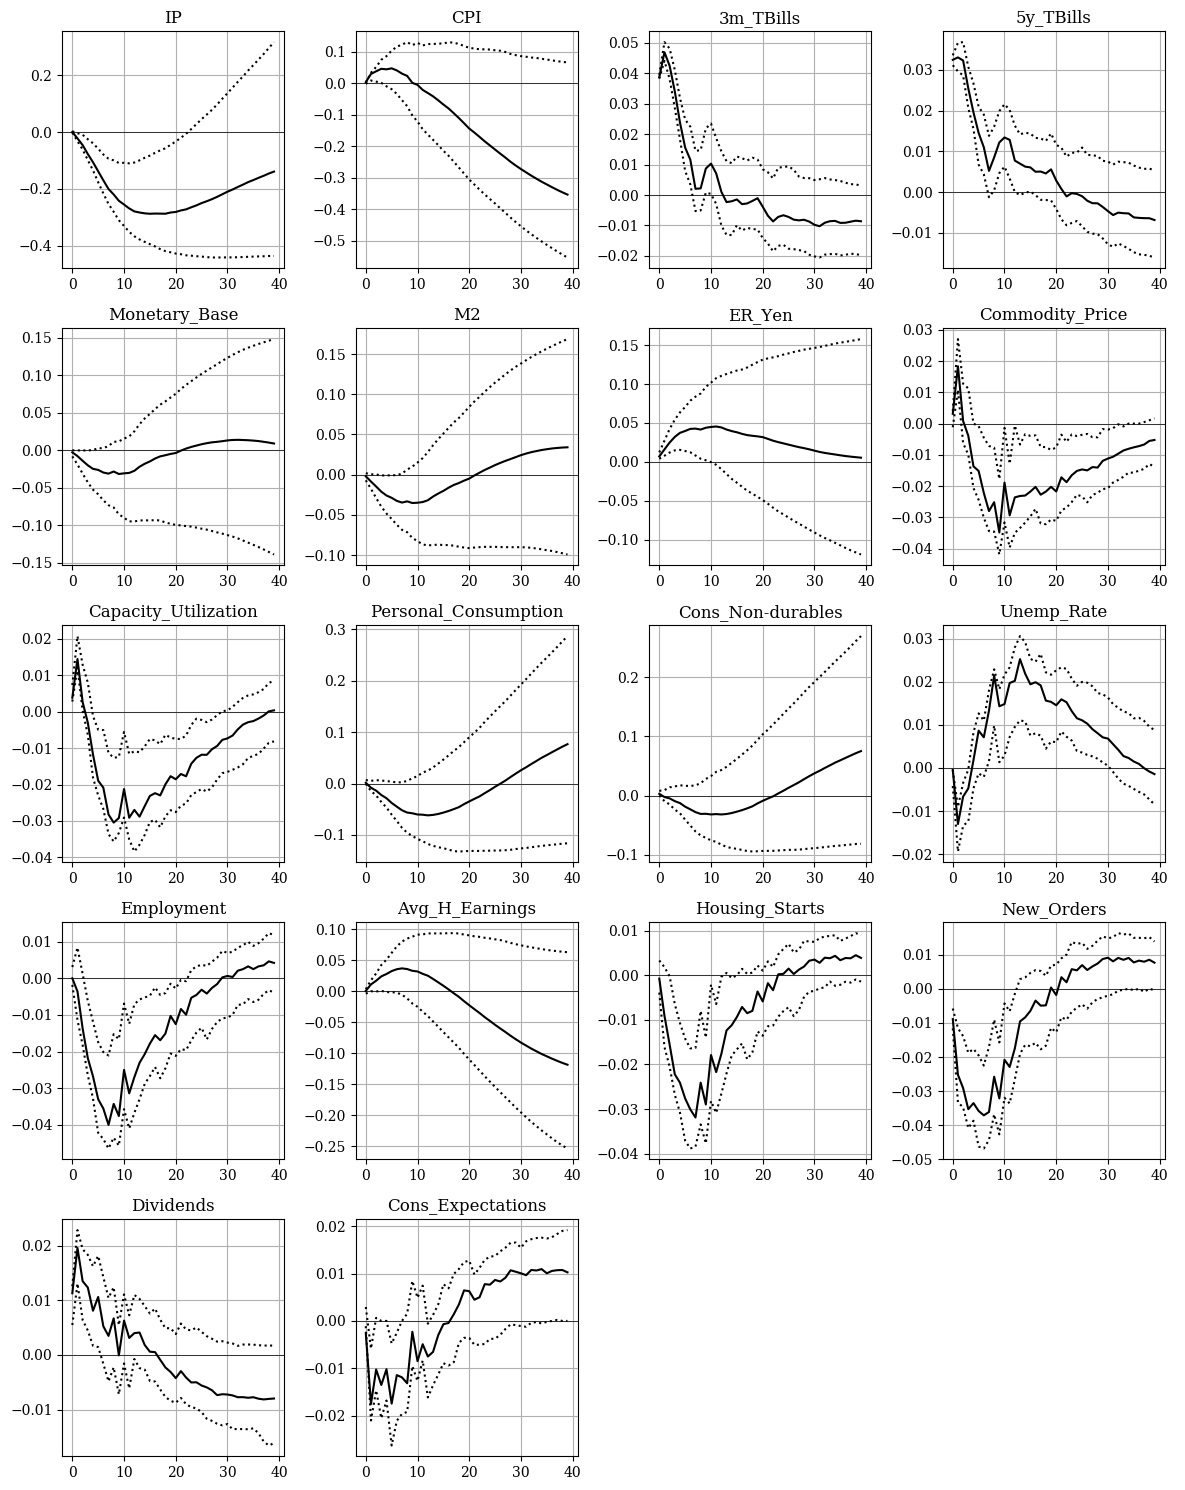

In [37]:
allplots(irf_x_23, impxci_23)

## σ multiplier = 1, number of factors = 4

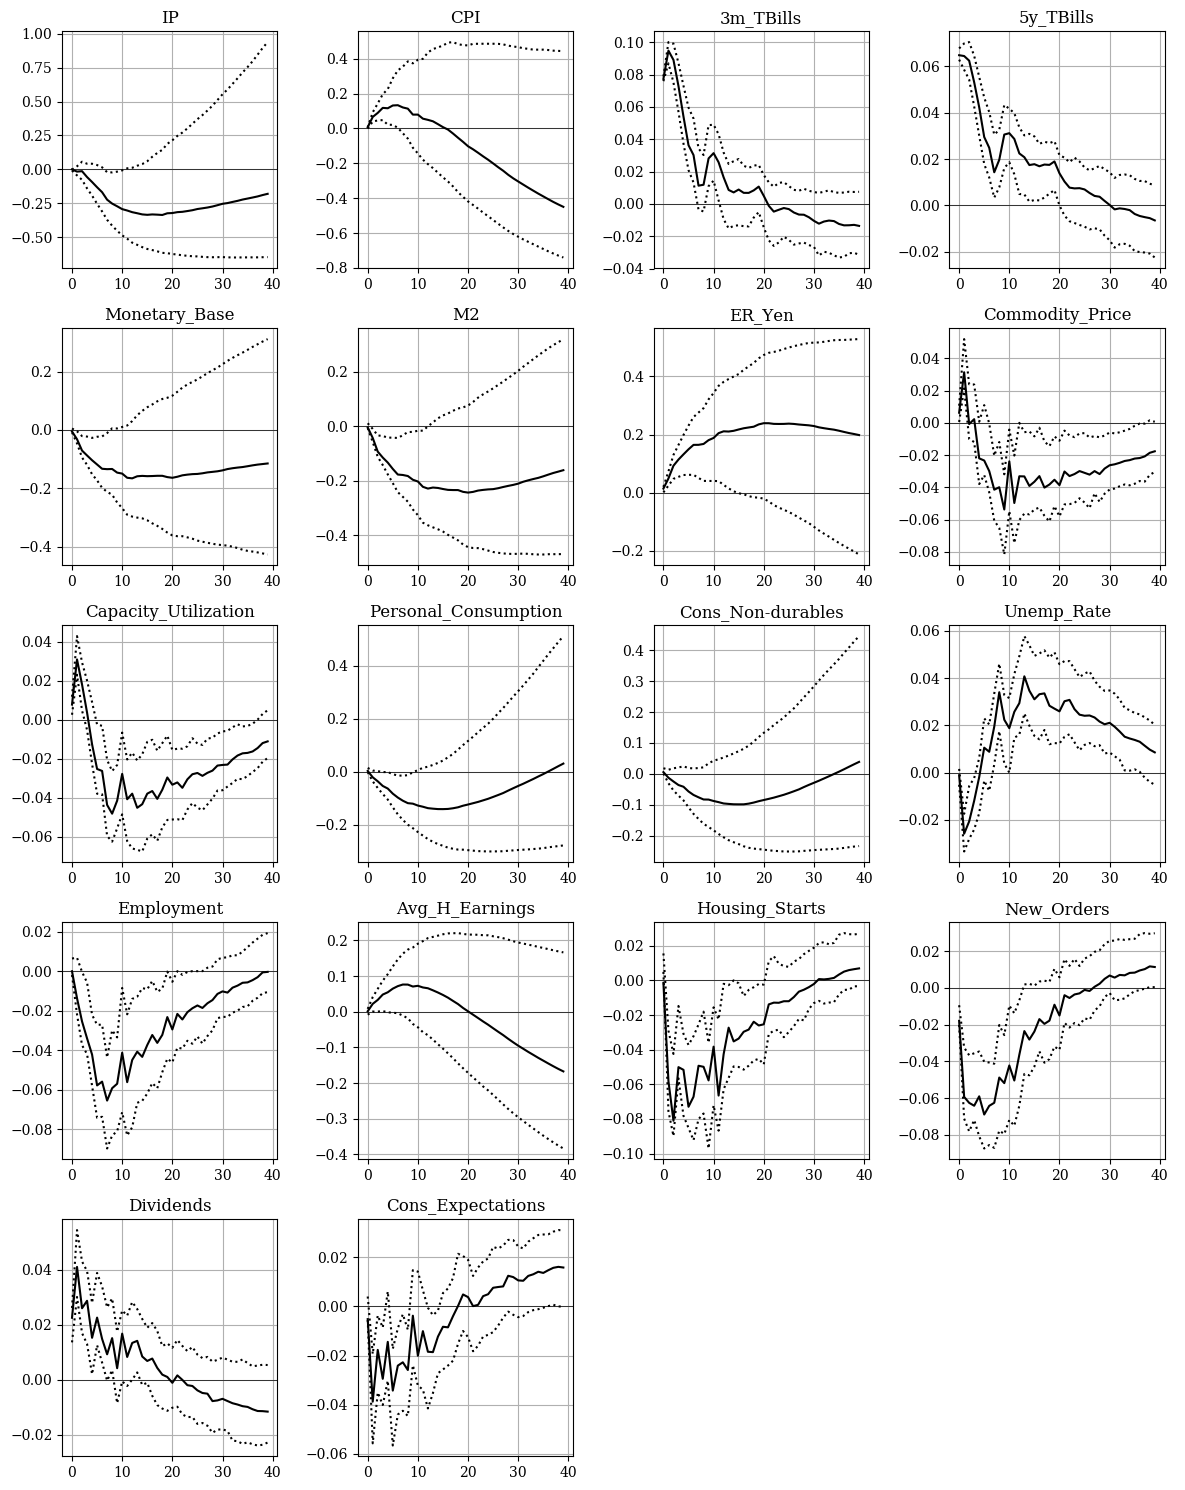

In [38]:
allplots(irf_x_14, impxci_14)

## σ multiplier = 1, number of factors = 5

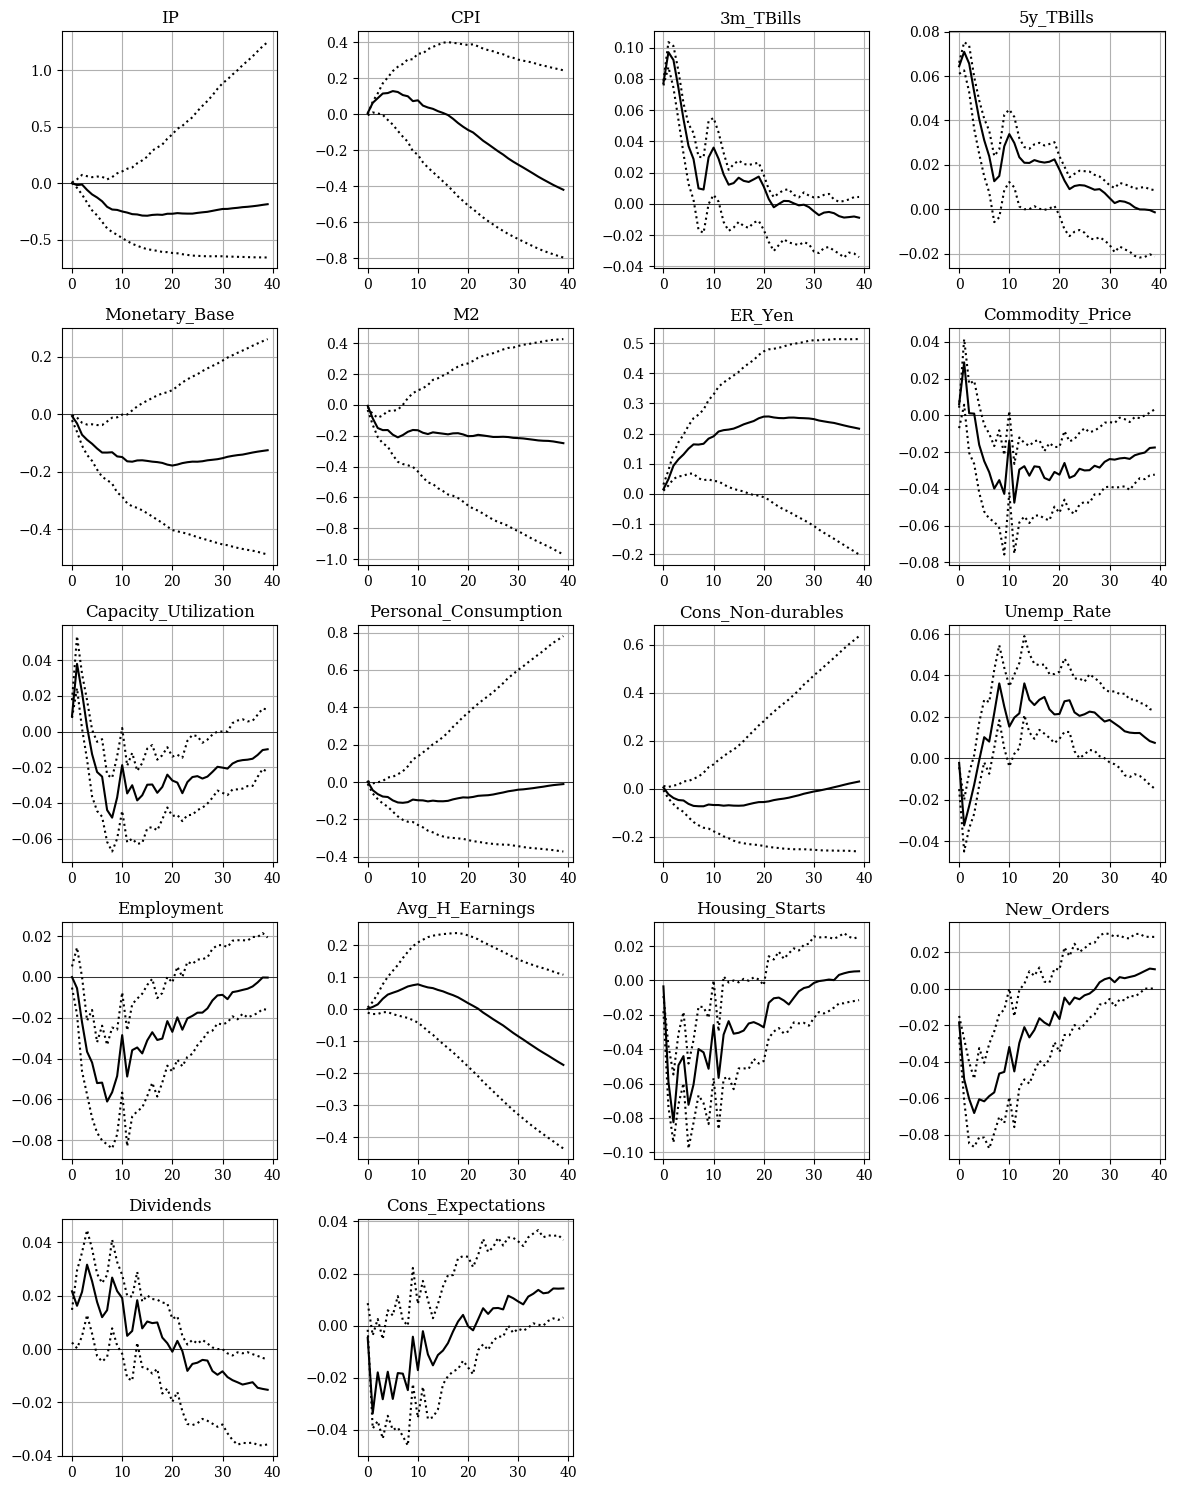

In [39]:
allplots(irf_x_15, impxci_15)